# Машинное обучение в биологии

### Семинар 4: Методы понижения размерности

#### Визуализация транскриптомных данных. Анализ данных, выявление выбросов и батч-эффекта.

In [1]:
!pip install umap-learn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split

sns.set()
sns.set_style("whitegrid")

### Задача 1: Визуализация транскриптомных данных

В этой задаче предлагается загрузить транскриптомные данные и произвести снижение размерности методом PCA.

**Загрузите датасет** (`gse53625_expression.csv`) и метаданные к нему (`gse53625_metadata.csv`).

In [6]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl" -O gse53625_expression.csv && rm -rf /tmp/cookies.txt
#
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N' -O gse53625_metadata.csv

urllib.request.urlretrieve("https://docs.google.com/uc?export=download&id=1vhCwAOc0v8HE75Q-47sWmETAmi_JiH7N", "gse53625_metadata.csv")

urllib.request.urlretrieve("https://docs.google.com/uc?export=download&id=1b5XLe7hVBv2Y0xiXaG0-SGGAk4HLSOTl", "gse53625_expression.csv")


('gse53625_expression.csv', <http.client.HTTPMessage at 0x1b150224610>)

In [2]:
X_temp = pd.read_csv('gse53625_expression.csv')
X = X_temp.T.drop(['gene'])
X.index = X.index.rename('gene')
X.head(), X.shape

(                0         1          2         3         4         5      \
 gene                                                                       
 GSM1296956  13.374975  3.536581  13.644486  3.929925  5.485977  9.363128   
 GSM1296957  13.555346  4.772572  14.153843  4.388201  5.412374  9.339831   
 GSM1296958  13.396705  4.804828  13.948490  4.395992  5.627752  7.867446   
 GSM1296959  13.843843  4.563550  14.390648  4.697154  5.511075  8.943584   
 GSM1296960  13.505687  4.750858  14.049400  4.476174  5.753380  8.475744   
 
                 6         7          8          9      ...     71574  \
 gene                                                   ...             
 GSM1296956  13.134106  4.318162  10.050190  10.605277  ...  3.533153   
 GSM1296957  13.789576  4.211175  11.242888  10.518348  ...  4.734086   
 GSM1296958  13.424588  4.097212  10.568927  10.666406  ...  4.802100   
 GSM1296959  14.181927  4.766994  10.418466  10.924152  ...  4.537808   
 GSM1296960  14.25564

In [4]:
y = pd.read_csv('gse53625_metadata.csv')
y.set_index('GEO accession', inplace=True)
y.index = y.index.rename('gene')
y.head(), y.shape, len(y['Dataset'].unique())

(           Sample type Patient ID   Dataset
 gene                                       
 GSM1296956      cancer      ec302  GSE53622
 GSM1296957      normal      ec302  GSE53622
 GSM1296958      cancer      ec303  GSE53622
 GSM1296959      normal      ec303  GSE53622
 GSM1296960      cancer      ec305  GSE53622,
 (358, 3),
 2)

In [5]:
data = X.join(y)
data

,0,1,2,3,4,5,6,7,8,9,...,71577,71578,71579,71580,71581,71582,71583,Sample type,Patient ID,Dataset
gene,,,,,,,,,,,,,,,,,,,,,
GSM1296956,13.374975,3.536581,13.644486,3.929925,5.485977,9.363128,13.134106,4.318162,10.050190,10.605277,...,6.889096,10.636753,6.656603,11.054070,6.914937,8.949687,8.982860,cancer,ec302,GSE53622
GSM1296957,13.555346,4.772572,14.153843,4.388201,5.412374,9.339831,13.789576,4.211175,11.242888,10.518348,...,8.220715,10.645032,5.799432,10.951782,5.358962,8.951818,8.147058,normal,ec302,GSE53622
GSM1296958,13.396705,4.804828,13.948490,4.395992,5.627752,7.867446,13.424588,4.097212,10.568927,10.666406,...,8.145627,11.452488,6.164146,11.492929,6.189310,9.091511,10.021106,cancer,ec303,GSE53622
GSM1296959,13.843843,4.563550,14.390648,4.697154,5.511075,8.943584,14.181927,4.766994,10.418466,10.924152,...,8.450327,10.966135,6.482977,10.869259,6.683605,9.321499,9.278717,normal,ec303,GSE53622
GSM1296960,13.505687,4.750858,14.049400,4.476174,5.753380,8.475744,14.255647,4.344796,10.189663,10.651861,...,7.615217,10.570247,5.861632,11.168351,6.343246,8.793520,11.562505,cancer,ec305,GSE53622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1297309,15.256065,3.658061,15.570171,3.675983,4.775737,9.004857,13.803322,3.613360,10.428065,11.150531,...,8.314984,10.506011,5.705946,11.927240,5.791150,8.892677,8.358156,normal,ec97,GSE53624
GSM1297310,14.967925,3.222255,15.230037,3.252973,5.800031,8.428823,13.788715,3.328510,10.749920,11.424053,...,9.500727,11.066595,6.409176,13.149535,6.509917,9.518373,11.193556,cancer,ec101,GSE53624
GSM1297311,15.166759,3.170619,15.528894,3.288352,6.643709,8.632197,14.925433,3.643658,12.994351,11.331890,...,9.285962,10.965488,6.346571,11.946386,6.230244,9.594640,10.014606,normal,ec101,GSE53624


**Обучите модель** PCA с двумя компонентами.

In [204]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.iloc[:, :-3])

X_pca_df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                    "y": data['Sample type'],
                    "dataset": data['Dataset']})

In [205]:
X_pca_df

,PC1,PC2,y,dataset
gene,,,,
GSM1296956,193.637809,3.269968,cancer,GSE53622
GSM1296957,59.982687,127.254775,normal,GSE53622
GSM1296958,108.322786,-32.339913,cancer,GSE53622
GSM1296959,61.070435,142.354371,normal,GSE53622
GSM1296960,144.879913,-72.937936,cancer,GSE53622
...,...,...,...,...
GSM1297309,-70.292522,-13.816062,normal,GSE53624
GSM1297310,-31.594632,-117.861975,cancer,GSE53624
GSM1297311,-126.477584,64.324758,normal,GSE53624


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

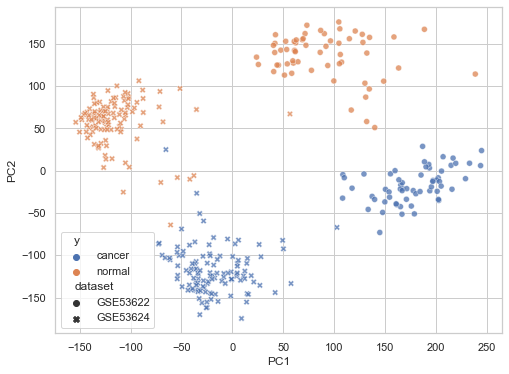

In [206]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue='y', style='dataset', data=X_pca_df, alpha=0.75)

**Постройте диаграмму рассеяния** для первых двух компонент.

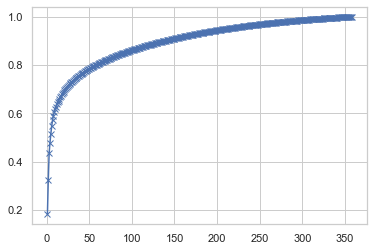

In [207]:
n = 358
pca = PCA(n_components=n)
X_pca = pca.fit_transform(data.iloc[:, :-3])

total_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, n + 1), total_explained, "x-")
plt.show()

**Какую долю дисперсии** объясняют найденные компоненты?

In [208]:
np.cumsum(pca.explained_variance_ratio_[:2])[-1]

0.32213274447273765

**Осуществите стандартизацию признаков** в выборке.

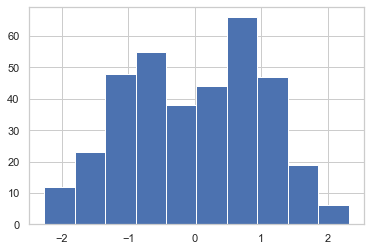

In [211]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, :-3])

plt.hist(X_scaled[:,2])
plt.show()

Произведите **обучение модели** PCA и **визуализацию**. Оцените долю объясняемой дисперсии.

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

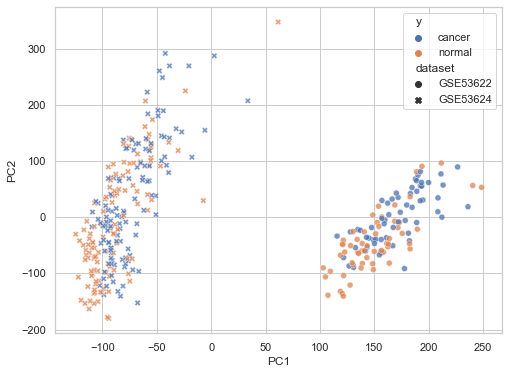

In [212]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_scaled_pca_df = pd.DataFrame({"PC1": X_pca[:,0],
                         "PC2": X_pca[:,1],
                         "y": data['Sample type'],
                         "dataset": data['Dataset']})

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue='y', style='dataset', data=X_scaled_pca_df, alpha=0.75)


**Какую долю дисперсии** объясняют найденные компоненты?

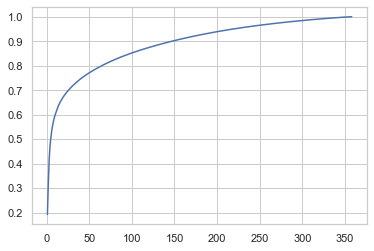

0.31210993096031836


In [213]:
n = 358
pca_scaled = PCA(n_components=n)
X_scaled_pca = pca_scaled.fit_transform(X_scaled)

total_explained = np.cumsum(pca_scaled.explained_variance_ratio_)
plt.plot(np.arange(1, n + 1), total_explained, "-")
plt.show()

print(np.cumsum(pca_scaled.explained_variance_ratio_[:2])[-1])

**Сделайте выводы**. Всегда ли стоит осуществлять нормализацию/стандартизацию транскриптомных данных?

В целом нормализация данных уменьшает осмысленность и эффективность PCA, так как мы теряем инфодрмацию о том, в каком порядке схлопывать оси. Это приводит к характерному (более медленный рост) виду графика объясненной дисперсии.
Конкретно в нашем случае два батча смешались, почему конкретно это случилось я не понимаю, но это не отменяет того факта, что из-за этого все исследование может сломаться


### Задача 2: Загрузка транскриптомных данных. Исправление batch-эффекта.

В этой задаче предлагается воспользоваться пакетом [pyComBat](https://github.com/epigenelabs/pyComBat) для коррекции batch-эффекта в транскриптомных данных.

**Установите пакет pyComBat в окружение**. Для этого воспользуйтесь инструкцией на главной странице [репозитория pyComBat](https://github.com/epigenelabs/pyComBat) на GitHub.

In [218]:
!pip install patsy

In [219]:
!pip install combat

  Using cached combat-0.3.2-py3-none-any.whl (36 kB)
  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build numpy pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [815 lines of output]
  setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.10.
    warnings.warn(
  Running from numpy source directory.
  C:\Users\OblakoVShtanakh\AppData\Local\Temp\pip-install-3i2oz_ky\numpy_6e2e7ad9fd12417387110be3504610ff\tools\cythonize.py:67: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
    from distutils.version import LooseVersion
  numpy/random\_bounded_integers.pxd.in has not changed
  numpy/random\bit_generator.pyx has not changed
  numpy/random\mtrand.pyx has not changed
  Processing numpy/random\_bounded_integers.pyx
  numpy/random\_bounded_integers.pyx.in has not changed
  numpy/random\_common.pyx has not changed
  numpy/random\_generator.pyx has not changed
  numpy/random\_mt19937.pyx has not changed
  numpy/random\_pcg64.pyx has not changed
  numpy/random\_philox.pyx

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [815 lines of output]
  setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.10.
    warnings.warn(
  Running from numpy source directory.
  C:\Users\OblakoVShtanakh\AppData\Local\Temp\pip-install-0wcssysf\numpy_7a7197b199d24314928c2aee0410e44d\tools\cythonize.py:67: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
    from distutils.version import LooseVersion
  numpy/random\_bounded_integers.pxd.in has not changed
  numpy/random\bit_generator.pyx has not changed
  numpy/random\mtrand.pyx has not changed
  Processing numpy/random\_bounded_integers.pyx
  numpy/random\_bounded_integers.pyx.in has not changed
  numpy/random\_common.pyx has not changed
  numpy/random\_generator.pyx has not changed
  numpy/random\_mt19937.pyx has not changed
  numpy/random\_pcg64.pyx has not changed
  numpy/random\_philox.pyx


  Using cached combat-0.3.2-py3-none-any.whl (36 kB)
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
Failed to build numpy pandas


**Разберитесь, как осуществляется коррекция batch-эффекта** в pyComBat и осуществите коррекцию.

In [220]:
from combat.pycombat import pycombat
data_corrected = pycombat(X)

ModuleNotFoundError: No module named 'combat'

**Сохраните полученный результат в файл** `gse53625_expression_corrected.csv`.

### Задача 3: Снижение размерности после коррекции batch-эффекта

В этой задаче предлагается сравнить результаты снижения размерности до и после коррекции batch-эффекта в транскриптомных данных.

**Загрузите датасет** `gse53625_expression_corrected.csv`, если вы не сделали предыдущее задание.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1P0OnSsTF9tn0yDq72k8ECVtgQL8pf_RP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1P0OnSsTF9tn0yDq72k8ECVtgQL8pf_RP" -O gse53625_expression_corrected.csv && rm -rf /tmp/cookies.txt

Произведите **обучение модели** PCA и **визуализацию**. Оцените долю объясняемой дисперсии.

Произведите **стандартизацию данных** и повторите предыдущий пункт.

**Сделайте выводы**.

### Задача 4: Классификация на основе данных сниженной размерности

В этой задаче предлагается сравнить качество двуклассовой классификации на исходных данных и на главных компонентах.

**Разбейте X и y на тренировочную и тестовую выборки**. Соотношение train/test поставьте равным 1:1.\
*Напоминание*: воспользуйтесь функцией `train_test_split`.

In [6]:
X = data.iloc[:, :-3]
y = data.iloc[:, -3:]

In [233]:
y

,Sample type,Patient ID,Dataset
gene,,,
GSM1296956,cancer,ec302,GSE53622
GSM1296957,normal,ec302,GSE53622
GSM1296958,cancer,ec303,GSE53622
GSM1296959,normal,ec303,GSE53622
GSM1296960,cancer,ec305,GSE53622
...,...,...,...
GSM1297309,normal,ec97,GSE53624
GSM1297310,cancer,ec101,GSE53624
GSM1297311,normal,ec101,GSE53624


**Стандартизуйте данные и обучите на них модель логистической регрессии**.

In [12]:
def encode(x):
    if x == 'cancer':
        return 1
    if x == 'normal':
        return 0

X_train, X_test, y_train, y_test = train_test_split(X, y['Sample type'].apply(lambda x: encode(x)), test_size=0.5, random_state=42)


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
])


clf.fit(X_train, y_train)

print('accuracy: ', accuracy_score(clf.predict(X_test), y_test))

accuracy 0.9832402234636871


Подберите **оптимальное количество компонент для PCA** на `X_train`.

Повторите обучение и оценку качества **с добавлением метода снижения размерности** перед обучением классификатора.

In [28]:
accuracy_scores = {}
for i in np.concatenate((np.arange(2,10,1), np.arange(10, 50, 5))):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)

    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
    ])


    clf.fit(X_pca_train, y_train)

    accuracy_scores[i] = (accuracy_score(clf.predict(X_pca_test), y_test))

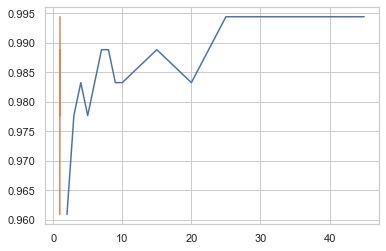

In [33]:
plt.plot(list(accuracy_scores.items()), list(accuracy_scores.values()))

**Оцените качество модели**.

При больших размерах датасета PCA поможет сэкономить время. Здесь же разницы между между различными методами особой нет.

**Сделайте выводы**.

### Задача 5: Сравнение способов визуализации данных

В этой задаче предлагается сравнить различные способы визуализации данных друг с другом.

In [221]:
from sklearn.datasets import fetch_openml

In [222]:
mnist = fetch_openml('mnist_784')

In [223]:
X = mnist.data
y = mnist.target

**Визуализируйте эти данные с помощью PCA, t-SNE и UMAP**. Попробуйте несколько различных комбинаций параметров в каждом случае.

**Сделайте выводы**.

---